# Exploratory data analysis
---

*By Joe Marcus*

Here I explore the datasets prepared in `notebooks/prepare_data.ipynb`

## Imports / configuration

In [13]:
suppressMessages(library(readr))
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(limma))

plot size configuration ...

In [53]:
options(repr.plot.width=5, repr.plot.height=3.5)

## Read data

In [63]:
meta_df <- readRDS('../output/meta/koh_gtex_meta.rds')
koh_count_mat  <- readRDS('../output/counts/koh_count_dey_genes.rds')
koh_gtex_count_mat <- readRDS('../output/counts/koh_gtex_count_dey_genes.rds')

In [64]:
dim(koh_count_mat)
dim(koh_gtex_count_mat)

[1] 15322    48

[1] 15322  9710

## PCA

### Koh et al data

In [57]:
koh_id_df <- data.frame(run_id=colnames(koh_count_mat)) %>% 
             inner_join(meta_df, by=c('run_id'))

# check the order is the same
all(koh_id_df$run_id == colnames(koh_count_mat))

Warning message:
“Column `run_id` joining factor and character vector, coercing into character vector”

[1] TRUE

Normalize the counts using voom before running pca ...

In [58]:
koh_norm_mat <- voom(t(koh_count_mat))$E
dim(koh_norm_mat)

[1]    48 15322

In [59]:
koh_pc_res <- prcomp(koh_norm_mat, scale=FALSE, center=FALSE)
koh_pc_res <- summary(koh_pc_res)
koh_pve <- koh_pc_res$importance['Proportion of Variance',]
koh_pc_labels <- paste0('PC', 1:nrow(koh_pc_res$x), ' (', round(koh_pve, 3) * 100, '%)')

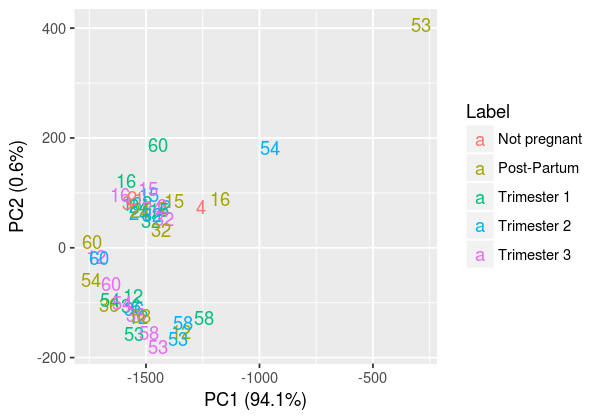

In [60]:
# pc1 vs pc2
qplot(koh_pc_res$x[,1], koh_pc_res$x[,2], 
      geom='text',
      label=substr(koh_id_df$iid, nchar(koh_id_df$iid)-2+1, nchar(koh_id_df$iid)),
      xlab=pc_labels[1], 
      ylab=pc_labels[2], 
      color=factor(koh_id_df$label)) + 
labs(color='Label') 

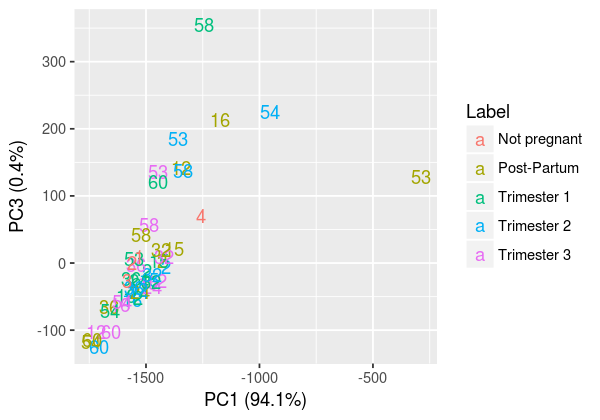

In [61]:
# pc1 vs pc2
qplot(koh_pc_res$x[,1], koh_pc_res$x[,3], 
      geom='text',
      label=substr(koh_id_df$iid, nchar(koh_id_df$iid)-2+1, nchar(koh_id_df$iid)),
      xlab=pc_labels[1], 
      ylab=pc_labels[3], 
      color=factor(koh_id_df$label)) + 
labs(color='Label') 

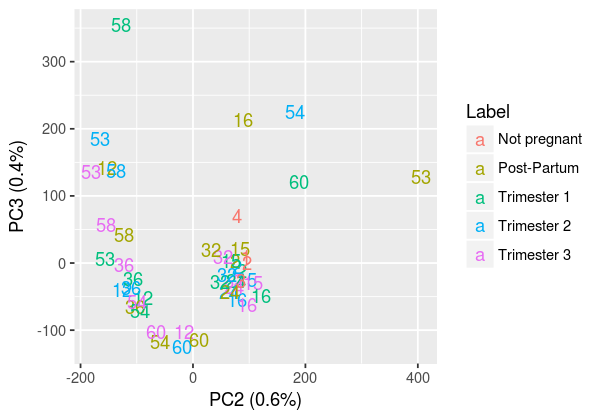

In [62]:
# pc2 vs pc3
qplot(koh_pc_res$x[,2], koh_pc_res$x[,3], 
      geom='text',
      label=substr(koh_id_df$iid, nchar(koh_id_df$iid)-2+1, nchar(koh_id_df$iid)),
      xlab=pc_labels[2], 
      ylab=pc_labels[3], 
      color=factor(koh_id_df$label)) + 
labs(color='Label')  

There seems to be no obvious clustering by time point but some perhaps some subtle clustering by indiviudal

### GTEx